<a href="https://colab.research.google.com/github/rfmergarejo/Physics/blob/main/double_pendulum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The double pendulum is a very complicate problem in physics where an analytical solution is almost impossible. 

In [27]:
import numpy as np
import sympy as smp

# Integrator.... Differential equation solver
from scipy.integrate import odeint

# All those librarys is for visualization.
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter

The representation is the following:





Defining the apporpiate symbols using `sympy` 

In [28]:
t, g = smp.symbols('t, g')
m1, m2 = smp.symbols('m1, m2')
L1, L2 = smp.symbols('L1, L2')

In [29]:
thet1, thet2 = smp.symbols(r'\theta_1, \theta_2', cls=smp.Function)

Explicitly writting $\theta_1$ and $\theta_2$ as a function of time.

In [30]:
thet1 = thet1(t)
thet2 = thet2(t)

Define the first and seconds derivatives.

In [31]:
thet1_D = smp.diff(thet1, t)
thet2_D = smp.diff(thet2, t)

thet1_2D = smp.diff(thet1_D, t)
thet2_2D = smp.diff(thet2_D, t)

Defining the cartesians coordinates in terms of the parameters defined above

In [32]:
x1 = -L1*smp.sin(thet1)
y1 = -L1*smp.cos(thet1)

x2 = x1 - L2*smp.sin(thet2)
y2 = y1 - L2*smp.cos(thet2)

Writing the Lagrangian 

In [33]:
# Kinetic Energy
K1 = 0.5 * m1 * (smp.diff(x1, t)**2 + smp.diff(y1, t)**2)
K2 = 0.5 * m2 * (smp.diff(x2, t)**2 + smp.diff(y2, t)**2)
K = K1+K2

# Potential 
V1 = m1*g*y1
V2 = m2*g*y2
V = V1 + V2

# Lagrangian
L = K-V

In [34]:
L

L1*g*m1*cos(\theta_1(t)) - g*m2*(-L1*cos(\theta_1(t)) - L2*cos(\theta_2(t))) + 0.5*m1*(L1**2*sin(\theta_1(t))**2*Derivative(\theta_1(t), t)**2 + L1**2*cos(\theta_1(t))**2*Derivative(\theta_1(t), t)**2) + 0.5*m2*((L1*sin(\theta_1(t))*Derivative(\theta_1(t), t) + L2*sin(\theta_2(t))*Derivative(\theta_2(t), t))**2 + (-L1*cos(\theta_1(t))*Derivative(\theta_1(t), t) - L2*cos(\theta_2(t))*Derivative(\theta_2(t), t))**2)

Get Lagrange equation:

$$ \frac{\partial L}{\partial \theta_1} - \frac{d}{dt}\frac{\partial L}{\partial \dot{\theta_1}} = 0 \\
\frac{\partial L}{\partial \theta_2} - \frac{d}{dt}\frac{\partial L}{\partial \dot{\theta_2}} = 0$$

In [35]:
LE1 = smp.diff(L, thet1) - smp.diff(smp.diff(L, thet1_D), t).simplify()
LE2 = smp.diff(L, thet2) - smp.diff(smp.diff(L, thet2_D), t).simplify()

In [36]:
LE1

-L1*g*m1*sin(\theta_1(t)) - L1*g*m2*sin(\theta_1(t)) - L1*(L1*m1*Derivative(\theta_1(t), (t, 2)) + L1*m2*Derivative(\theta_1(t), (t, 2)) - L2*m2*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)*Derivative(\theta_2(t), t) + L2*m2*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), t)**2 + L2*m2*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), (t, 2))) + 0.5*m2*(2*L1*(L1*sin(\theta_1(t))*Derivative(\theta_1(t), t) + L2*sin(\theta_2(t))*Derivative(\theta_2(t), t))*cos(\theta_1(t))*Derivative(\theta_1(t), t) + 2*L1*(-L1*cos(\theta_1(t))*Derivative(\theta_1(t), t) - L2*cos(\theta_2(t))*Derivative(\theta_2(t), t))*sin(\theta_1(t))*Derivative(\theta_1(t), t))

In [37]:
LE2

-L2*g*m2*sin(\theta_2(t)) - 1.0*L2*m2*(-L1*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)**2 + L1*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)*Derivative(\theta_2(t), t) + L1*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), (t, 2)) + L2*Derivative(\theta_2(t), (t, 2))) + 0.5*m2*(2*L2*(L1*sin(\theta_1(t))*Derivative(\theta_1(t), t) + L2*sin(\theta_2(t))*Derivative(\theta_2(t), t))*cos(\theta_2(t))*Derivative(\theta_2(t), t) + 2*L2*(-L1*cos(\theta_1(t))*Derivative(\theta_1(t), t) - L2*cos(\theta_2(t))*Derivative(\theta_2(t), t))*sin(\theta_2(t))*Derivative(\theta_2(t), t))

Solving the Lagrangian equations (assuming that `LE1` and `LE2` are equal to zero)

In [38]:
sols = smp.solve([LE1, LE2], (thet1_2D, thet2_2D), simplify=False, rational=False)

Converting the symbolic expressions above to numerical functions so we can use them in a numerical python solver.



In [39]:
dz1dt_f = smp.lambdify((t,g,m1,m2,L1,L2,thet1,thet2,thet1_D,thet2_D), sols[thet1_2D])
dz2dt_f = smp.lambdify((t,g,m1,m2,L1,L2,thet1,thet2,thet1_D,thet2_D), sols[thet2_2D])

dthe1dt_f = smp.lambdify(thet1_D, thet1_D)
dthe2dt_f = smp.lambdify(thet2_D, thet2_D)

In [40]:
def dSdt(S, t, g, m1, m2, L1, L2):
    thet1, z1, thet2, z2 = S
    return [
        dthe1dt_f(z1),
        dz1dt_f(t, g, m1, m2, L1, L2, thet1, thet2, z1, z2),
        dthe2dt_f(z2),
        dz2dt_f(t, g, m1, m2, L1, L2, thet1, thet2, z1, z2),
    ]

In [41]:
t = np.linspace(0, 40, 2001)
g = 9.81
m1=2
m2=1
L1 = 2
L2 = 1

ans = odeint(dSdt, y0=[1, -3, -1, 5], t=t, args=(g,m1,m2,L1,L2))

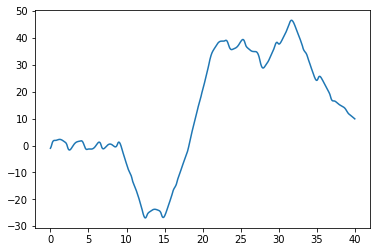

In [42]:
the1 = ans.T[0]
the2 = ans.T[2]


plt.plot(t, the2)

In [43]:
def get_x1y1x2y2(t, the1, the2, L1, L2):
    return (L1*np.sin(the1),
            -L1*np.cos(the1),
            L1*np.sin(the1) + L2*np.sin(the2),
            -L1*np.cos(the1) - L2*np.cos(the2))

x1, y1, x2, y2 = get_x1y1x2y2(t, ans.T[0], ans.T[2], L1, L2)

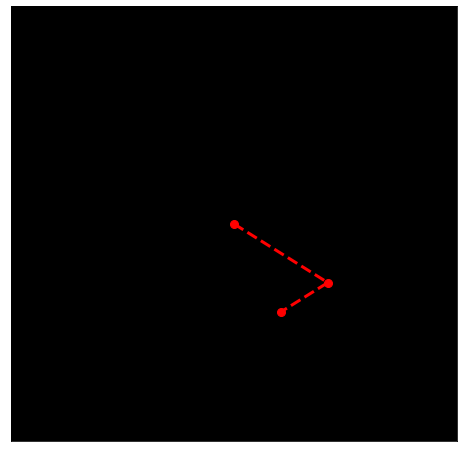

In [45]:
def animate(i):
    ln1.set_data([0, x1[i], x2[i]], [0, y1[i], y2[i]])
    
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.set_facecolor('k')
ax.get_xaxis().set_ticks([])    # enable this to hide x axis ticks
ax.get_yaxis().set_ticks([])    # enable this to hide y axis ticks
ln1, = plt.plot([], [], 'ro--', lw=3, markersize=8)
ax.set_ylim(-4,4)
ax.set_xlim(-4,4)
ani = animation.FuncAnimation(fig, animate, frames=2000, interval=50)
ani.save('pen.gif',writer='pillow',fps=25)